<h2>Load the Dataset</h2>


In [49]:

import pandas as pd # data manipulation library
from sklearn.impute import KNNImputer,SimpleImpute # data preprocessing
from sklearn.model_selection import train_test_split # Trainning Testing Split
from sklearn.model_selection import GridSearchCV # Cross validation multiple iteration
from sklearn.metrics import mean_squared_error, r2_score # Model evaluation
import warnings
warnings.filterwarnings("ignore") # warning ignore
from sklearn.tree import DecisionTreeRegressor # Decision tree Algorithm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # boosting Algorithms

file_path = 'BKB_WaterQualityData_2020084.csv'  # Dataset
data = pd.read_csv(file_path) # Reading dataset

data

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.000000,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.600000,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.600000,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.700000,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.000000,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,Bay,NaN,10/11/2018,1.9,5.0,7.0,4.00,1.20,25.0,NaN,78.00,09:30,Sue Poe,11/13/2019,Christine Folks,25.555556,2018
2367,Bay,NaN,10/24/2018,0.0,9.0,7.0,0.30,0.60,18.0,NaN,58.00,09:30,Sue Poe,11/13/2019,Christine Folks,14.444444,2018
2368,Bay,NaN,10/28/2018,0.9,2.9,7.0,0.40,0.90,13.0,NaN,49.00,09:20,Sue Poe,11/13/2019,Christine Folks,9.444444,2018
2369,Bay,NaN,11/7/2018,1.7,NaN,7.0,0.45,0.90,20.0,NaN,65.00,09:45,Sue Poe,11/13/2019,Christine Folks,18.333333,2018


<h2>Data Cleaning</h2>


In [51]:
print(data.isnull().sum())

Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64


In [52]:
data.describe()# Display basic statistics

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),AirTemp (C),Year
count,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,85.000000,2300.000000,2371.000000,2371.000000
mean,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,16.437647,62.051637,15.663050,2006.049346
std,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,11.754138,15.492236,10.314720,9.002373
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,0.000000,10.500000,-17.777778,1899.000000
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,9.000000,49.000000,8.888889,2001.000000
50%,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,15.000000,63.000000,16.666667,2007.000000
75%,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,21.700000,75.000000,23.888889,2012.000000
max,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,74.000000,92.300000,33.500000,2019.000000


<h2>Exploratory Data Analysis (EDA)</h2>

In [54]:
data["Year"].unique() # filter unique years

array([1994, 1989, 1990, 1991, 1992, 1993, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 1899, 2016, 2017, 2018, 2019],
      dtype=int64)

In [55]:
# List of important columns with corrected names
important_columns = [
    'Site_Id', 'Read_Date', 'Salinity (ppt)', 'Dissolved Oxygen (mg/L)',
    'pH (standard units)', 'Secchi Depth (m)', 'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius'
]

# Drop the remaining columns
df = data[important_columns]
df

,Site_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius
0,Bay,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0
1,Bay,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6
2,Bay,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6
3,Bay,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7
4,Bay,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0
...,...,...,...,...,...,...,...,...,...
2366,Bay,10/11/2018,1.9,5.0,7.0,4.00,1.20,25.0,NaN
2367,Bay,10/24/2018,0.0,9.0,7.0,0.30,0.60,18.0,NaN
2368,Bay,10/28/2018,0.9,2.9,7.0,0.40,0.90,13.0,NaN
2369,Bay,11/7/2018,1.7,NaN,7.0,0.45,0.90,20.0,NaN


In [56]:
df.isna().mean()*100 # Null values count 

Site_Id                     0.042176
Read_Date                   0.210881
Salinity (ppt)              5.482919
Dissolved Oxygen (mg/L)    35.892029
pH (standard units)         4.006748
Secchi Depth (m)            3.078870
Water Depth (m)             2.994517
Water Temp (?C)             5.103332
Air Temp-Celsius           96.415015
dtype: float64

In [57]:
df.drop(["Air Temp-Celsius","Site_Id"],axis=1,inplace=True) # removing columns which has max null values


In [58]:
df["Read_Date"].fillna(method="bfill",inplace=True) # fill values for important column


In [59]:
# Initialize KNNImputer with k=5 
imputer = KNNImputer(n_neighbors=5)

# Convert relevant columns to numeric 
numeric_columns = ['Dissolved Oxygen (mg/L)', 'pH (standard units)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply KNN imputation
df_filled = pd.DataFrame(imputer.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Replace the original column with imputed values
df['Dissolved Oxygen (mg/L)'] = df_filled['Dissolved Oxygen (mg/L)']

In [60]:
# Columns to apply SimpleImputer (exclude those you mentioned)
columns_to_impute = ['Salinity (ppt)', 'pH (standard units)', 'Secchi Depth (m)', 'Water Depth (m)', 'Water Temp (?C)']

# Initialize SimpleImputer with strategy='mean' or 'median' or 'most_frequent'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [61]:
df.isna().sum() # check for missing values


Read_Date                  0
Salinity (ppt)             0
Dissolved Oxygen (mg/L)    0
pH (standard units)        0
Secchi Depth (m)           0
Water Depth (m)            0
Water Temp (?C)            0
dtype: int64

In [62]:
df["Read_Date"]=pd.DatetimeIndex(df["Read_Date"])
df["months"]=pd.DatetimeIndex(df["Read_Date"]).month #created month column from date
df["Year"]=pd.DatetimeIndex(df["Read_Date"]).year #created year column from date
df.drop(["Read_Date"],axis=1,inplace=True) # remove date column 

In [63]:
df

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),months,Year
0,1.3,11.70,7.3,0.40,0.40,5.9,1,1994
1,1.5,12.00,7.4,0.20,0.35,3.0,1,1994
2,1.0,10.50,7.2,0.25,0.60,5.9,2,1994
3,1.0,10.10,7.4,0.35,0.50,10.0,2,1994
4,1.0,12.60,7.2,0.20,0.40,1.6,2,1994
...,...,...,...,...,...,...,...,...
2366,1.9,5.00,7.0,4.00,1.20,25.0,10,2018
2367,0.0,9.00,7.0,0.30,0.60,18.0,10,2018
2368,0.9,2.90,7.0,0.40,0.90,13.0,10,2018
2369,1.7,4.98,7.0,0.45,0.90,20.0,11,2018


In [64]:
# Define weights for each parameter 
weights = {
    'Salinity (ppt)': 0.2,
    'Dissolved Oxygen (mg/L)': 0.3,
    'pH (standard units)': 0.3,
    'Secchi Depth (m)': 0.2,
}

# Function to calculate WQI for each row
def calculate_wqi(row):
    # Normalize each parameter 
    normalized_values = {
        'Salinity (ppt)': row['Salinity (ppt)'] / 35 * 100,
        'Dissolved Oxygen (mg/L)': row['Dissolved Oxygen (mg/L)'] / 8.5 * 100,
        'pH (standard units)': row['pH (standard units)'] / 7.5 * 100,
        'Secchi Depth (m)': row['Secchi Depth (m)'] / 3.5 * 100,
    }
    
    # Calculate WQI using weighted average
    wqi = sum(normalized_values[param] * weights[param] for param in weights)
    
    return wqi

# Apply the WQI calculation
df['WQI'] = df.apply(calculate_wqi, axis=1)
df


,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),months,Year,WQI
0,1.3,11.70,7.3,0.40,0.40,5.9,1,1994,73.522689
1,1.5,12.00,7.4,0.20,0.35,3.0,1,1994,73.952941
2,1.0,10.50,7.2,0.25,0.60,5.9,2,1994,67.858824
3,1.0,10.10,7.4,0.35,0.50,10.0,2,1994,67.818487
4,1.0,12.60,7.2,0.20,0.40,1.6,2,1994,74.984874
...,...,...,...,...,...,...,...,...,...
2366,1.9,5.00,7.0,4.00,1.20,25.0,10,2018,69.589916
2367,0.0,9.00,7.0,0.30,0.60,18.0,10,2018,61.478992
2368,0.9,2.90,7.0,0.40,0.90,13.0,10,2018,41.035294
2369,1.7,4.98,7.0,0.45,0.90,20.0,11,2018,49.119328


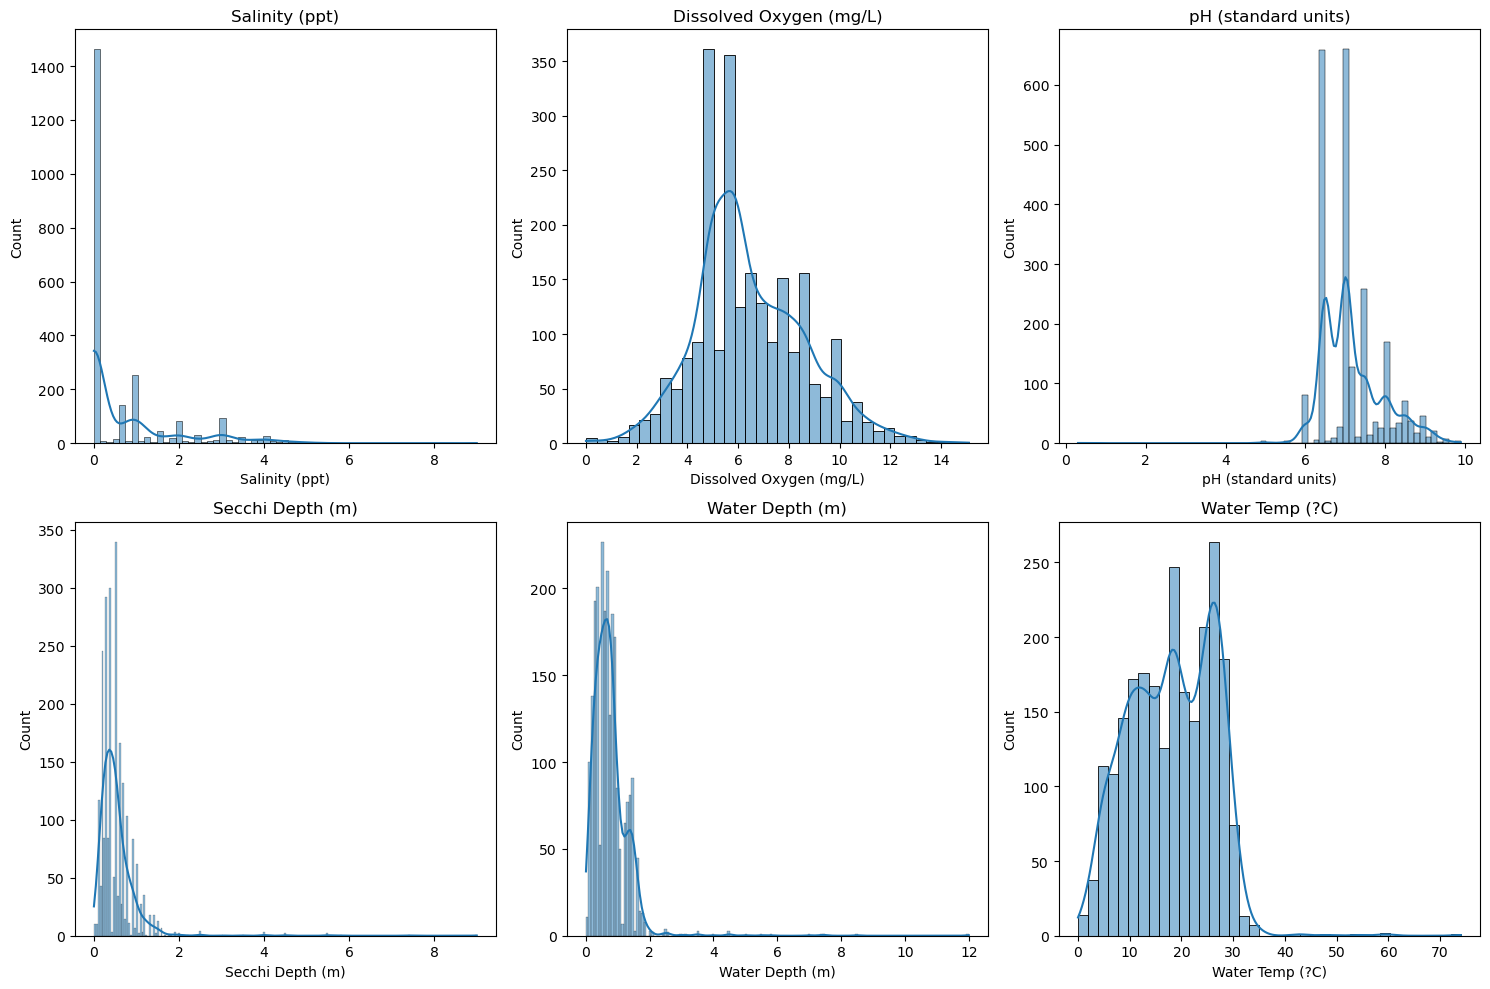

In [65]:
import matplotlib.pyplot as plt # data vsualiation library
import seaborn as sns # For Advanced data visualization
# List of columns to plot
columns_to_plot = ['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)', 'Water Depth (m)', 'Water Temp (?C)']

# Create distplots for each column
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid of plots
    sns.histplot(df[column], kde=True)
    plt.title(column)
# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


<Axes: >

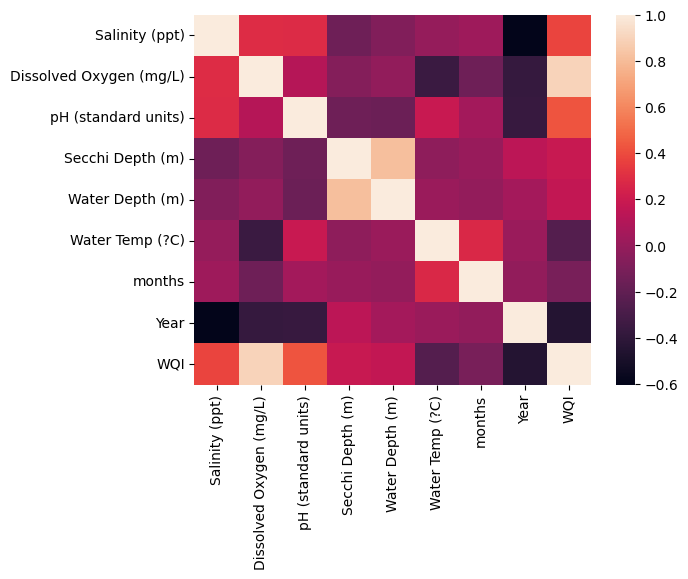

In [66]:
cor=df.corr() # correlation Matrix for all columns 
sns.heatmap(cor)


<h2>observation (°C)</h2>


The heatmap represents the correlation matrix for various water quality parameters, including Salinity (ppt), Dissolved Oxygen (mg/L), pH, Secchi Depth (m), Water Depth (m), Water Temperature (°C), months, year, and Water Quality Index (WQI). The color gradient indicates the strength and direction of the correlations, ranging from -0.6 (dark purple) to 1.0 (light orange).



<h1>Key Observations:</h1>

<h2>Salinity (ppt)</h2>

Positively correlated with Water Temperature (°C). 
Negatively correlated with Dissolved Oxygen (mg/L) and Secchi Depth (m).




Dissolved Oxygen (mg/L):

Strong positive correlation with Secchi Depth (m). Strong negative correlation with Water Temperature (°C).

pH (standard units):



Moderately positive correlation with Secchi Depth (m). Weak negative correlation with Water.

Temperature (°C).

The histogram shows a bimodal distribution with peaks around 20°C and 30°C, and a long tail extending to higher temperatures.

Secchi Depth (m):

Strong positive correlation with Dissolved Oxygen (mg/L). Negative correlation with Water Depth (m).


Water Depth (m):

Weak negative correlation with Secchi Depth (m). Weak positive correlation with Water Temperature (°C).



Strong negative correlation with Dissolved Oxygen (mg/L). Positive correlation with Salinity (ppt).




Positive correlation with Water Temperature (°C). Negative correlation with Dissolved Oxygen (mg/L).



Weak positive correlations with Water Temperature (°C) and Secchi Depth (m).


WQI:

Positive correlation with pH (standard units) and Secchi Depth (m). 
Negative correlation with Salinity (ppt) and Water Temperature (°C).

<Axes: title={'center': 'pH (standard units) by state and year'}, xlabel='Year', ylabel='months'>

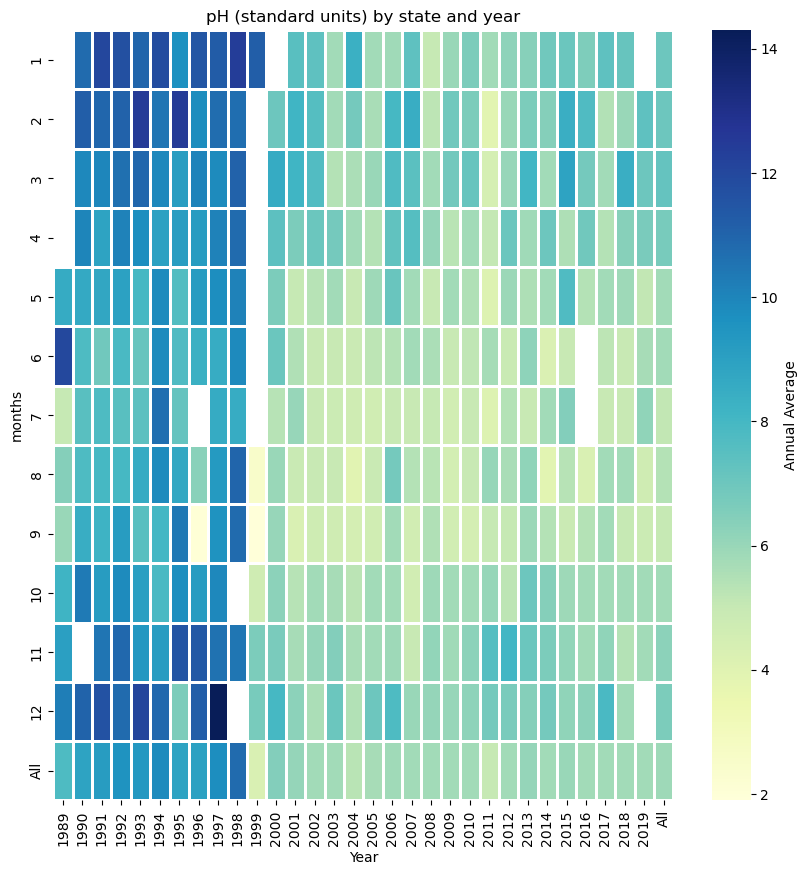

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('pH (standard units)'))
sns.heatmap(df.pivot_table('Dissolved Oxygen (mg/L)', index='months',
                columns=['Year'],aggfunc='median',margins=True),
                 cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

General Decline: There is a noticeable trend towards lower pH levels (more acidic conditions) from 1989 to 2019. This could be indicative of changing environmental conditions affecting water chemistry.

Seasonal Influence: Seasonal trends show lower pH levels during the summer months, likely due to increased biological activity and temperature effects.

Potential Causes: The decline and variations could be due to several factors, including increased pollution, acid rain, or changes in land use and water management practices.

<Axes: title={'center': 'Dissolved Oxygen (mg/L) by state and year'}, xlabel='Year', ylabel='months'>

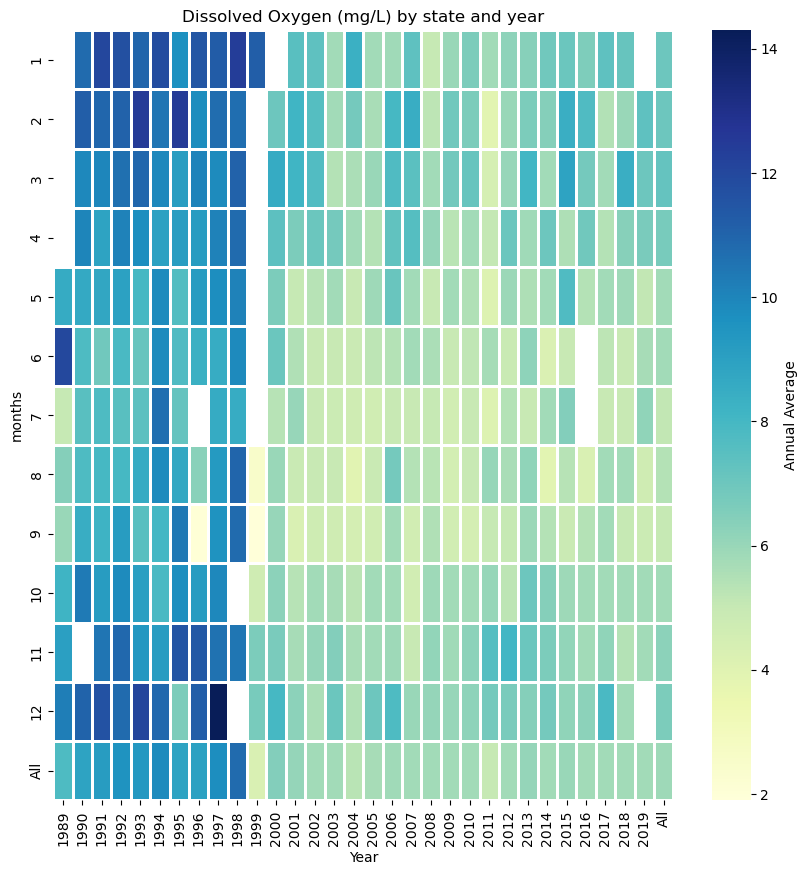

In [86]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('Dissolved Oxygen (mg/L)'))
sns.heatmap(df.pivot_table('Dissolved Oxygen (mg/L)', index='months',
                columns=['Year'],aggfunc='median',margins=True),
                 cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

There is a noticeable general decline in dissolved oxygen levels from 1989 to 2019. This could be indicative of deteriorating water quality over the years. Seasonal Influence: Seasonal trends show lower dissolved oxygen levels during the summer months, likely due to higher temperatures reducing oxygen solubility. Potential Causes: The decline and variations could be due to several factors, including increased pollution, changes in water temperature, or other environmental impacts. Further Analysis: Additional analysis could focus on correlating these trends with environmental policies, industrial activities, or climatic changes over the same period to identify potential causes.

In [88]:
df

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),months,Year,WQI
0,1.3,11.70,7.3,0.40,0.40,5.9,1,1994,73.522689
1,1.5,12.00,7.4,0.20,0.35,3.0,1,1994,73.952941
2,1.0,10.50,7.2,0.25,0.60,5.9,2,1994,67.858824
3,1.0,10.10,7.4,0.35,0.50,10.0,2,1994,67.818487
4,1.0,12.60,7.2,0.20,0.40,1.6,2,1994,74.984874
...,...,...,...,...,...,...,...,...,...
2366,1.9,5.00,7.0,4.00,1.20,25.0,10,2018,69.589916
2367,0.0,9.00,7.0,0.30,0.60,18.0,10,2018,61.478992
2368,0.9,2.90,7.0,0.40,0.90,13.0,10,2018,41.035294
2369,1.7,4.98,7.0,0.45,0.90,20.0,11,2018,49.119328


In [89]:
x = df.drop('WQI', axis=1) #All columns except WQI
y = df['WQI']#b target column

In [90]:
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=52) # 33 % testing rows
X_test

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),months,Year
679,0.0,5.100000,8.900000,1.300000,1.400000,9.0,1,2002
1812,0.0,6.646263,7.168212,2.200000,0.762559,10.0,2,2013
92,0.7,11.800000,8.000000,0.200000,0.390000,9.0,1,1991
2045,0.0,5.500000,7.500000,0.250000,0.800000,13.0,11,2015
2120,0.0,6.700000,7.000000,3.000000,3.500000,5.0,12,2016
...,...,...,...,...,...,...,...,...
1746,0.0,8.580000,7.500000,0.350000,0.350000,10.0,2,2012
1475,0.0,5.000000,7.000000,0.600000,1.700000,23.0,5,2009
1395,1.0,5.600000,6.500000,0.600000,0.850000,12.0,12,2008
1826,0.0,5.820000,6.500000,0.524898,0.762559,21.0,9,2013


In [91]:
# Function to train and evaluate model
def train_and_evaluate(model, params, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train) #trainning
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred) # evaluation using MSE
    r2 = r2_score(y_test, y_pred)
    return best_model, mse, r2, grid.best_params_

In [92]:
# model hyperparameters
models = {
    'Decision Tree': (DecisionTreeRegressor(random_state=42), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}),
    'Random Forest': (RandomForestRegressor(random_state=42), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10, 20]}),
    'Gradient Boosting': (GradientBoostingRegressor(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),

}

In [93]:
# Training and evaluating models
results = {}
for name, (model, params) in models.items():
    best_model, mse, r2, best_params = train_and_evaluate(model, params, X_train, y_train, X_test, y_test)
    results[name] = {'mse': mse, 'r2': r2, 'best_params': best_params}
    print(f'{name} Regression MSE: {mse}, R2: {r2}, Best Params: {best_params}')

Decision Tree Regression MSE: 5.7660503273639465, R2: 0.9276237633824197, Best Params: {'max_depth': None, 'min_samples_split': 2}
Random Forest Regression MSE: 3.812264208514518, R2: 0.9521479486408992, Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Gradient Boosting Regression MSE: 1.8572594514624092, R2: 0.9766874304094508, Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


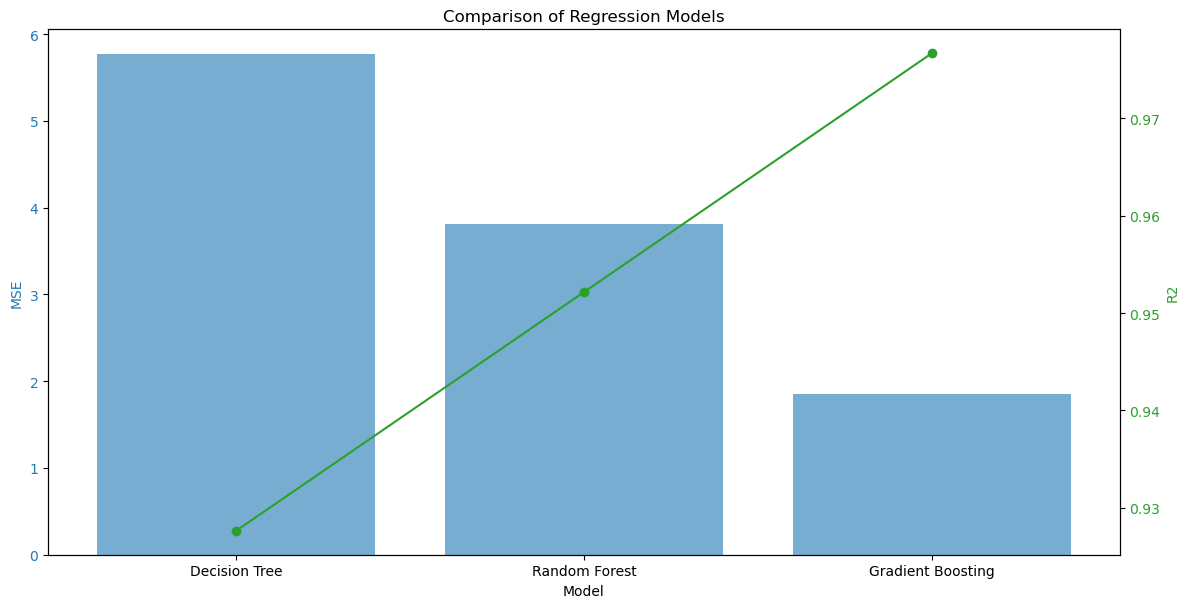

In [94]:

model_names = list(results.keys())
mses = [results[name]['mse'] for name in model_names] # MSE comparison
r2s = [results[name]['r2'] for name in model_names] # Accuracy comparison

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('MSE', color=color)
ax1.bar(model_names, mses, color=color, alpha=0.6, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('R2', color=color)
ax2.plot(model_names, r2s, color=color, marker='o', label='R2')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparison of Regression Models')
plt.show()

Lower the MSE and Higher the Accuracy represents the accurate model which is Gradient Boosting by above barplot.

In [96]:

import numpy as np
# Select 5 random indices from the test set
random_indices = np.random.choice(range(len(X_test)), size=5, replace=False)

# Extract the corresponding test samples and true labels
random_samples = X_test.iloc[random_indices]
actual_labels = y_test.iloc[random_indices].values  # Use iloc for positional indexing

# Create a DataFrame to store the results
comparison_df = pd.DataFrame(columns=['Model', 'Actual', 'Predicted'])

# Predict using each trained model and store the results
for name, model in best_models.items():
    predictions = model.predict(random_samples)
    
    for actual, predicted in zip(actual_labels, predictions):
        row = pd.DataFrame({
            'Model': [name],
            'Actual': [actual],
            'Predicted': [predicted]
        })
        comparison_df = pd.concat([comparison_df, row], ignore_index=True)

In [98]:
comparison_df # results of all models with their predicted values

,Model,Actual,Predicted
0,Decision Tree,62.684034,70.151261
1,Decision Tree,58.134454,54.987389
2,Decision Tree,67.927731,66.978151
3,Decision Tree,61.277311,61.848739
4,Decision Tree,50.067227,49.361345
5,Random Forest,62.684034,64.794356
6,Random Forest,58.134454,55.859696
7,Random Forest,67.927731,67.310489
8,Random Forest,61.277311,60.820264
9,Random Forest,50.067227,49.498454
